<a href="https://colab.research.google.com/github/AiswaryaGoriparthi/Aiswarya_INFO5731_Fall2024/blob/main/Goriparthi_Aiswarya_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [20]:
# Write your code here
# Import necessary libraries
import pandas as pd
from gensim.parsing.preprocessing import (
    remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text
)
from gensim import corpora
from gensim.models import LsiModel, LdaMulticore, TfidfModel

# Load the dataset and drop missing values
file_path = '/content/sentiment_analysis_data.csv'
data = pd.read_csv(file_path)
text_data = data['clean_text'].dropna()

# Preprocess the text data
def preprocess(text):
    custom_filters = [lambda x: x.lower(), remove_stopwords, strip_punctuation, strip_short]
    return preprocess_string(text, custom_filters)

data['Cleaned_Text'] = data['clean_text'].apply(preprocess)

# Create a dictionary and a bag-of-words representation
corpus = data['Cleaned_Text']
dictionary = corpora.Dictionary(corpus)

# Filter extremes to remove overly common and rare tokens
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert documents to bag-of-words format
bow = [dictionary.doc2bow(text) for text in corpus]

# Apply TF-IDF transformation
tfidf = TfidfModel(bow)
tfidf_corpus = tfidf[bow]

# Apply Latent Semantic Analysis (LSA) for topic modeling
lsa_model = LsiModel(tfidf_corpus, num_topics=10, id2word=dictionary)
lsa_topics = [lsa_model.print_topic(i, topn=10) for i in range(10)]

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda_model = LdaMulticore(corpus=bow, id2word=dictionary, num_topics=10, passes=10, workers=2)
lda_topics = lda_model.print_topics(num_words=10)

# Display the topics identified by LSA
print("Top 10 Topics Identified by LSA:")
for idx, topic in enumerate(lsa_topics):
    print(f"Topic {idx + 1}: {topic}")

# Display the topics identified by LDA
print("\nTop 10 Topics Identified by LDA:")
for idx, topic in lda_topics:
    print(f"Topic {idx + 1}: {topic}")


Top 10 Topics Identified by LSA:
Topic 1: -0.122*"matrix" + -0.117*"like" + -0.114*"great" + -0.113*"best" + -0.111*"time" + -0.098*"shawshank" + -0.098*"action" + -0.095*"watch" + -0.090*"story" + -0.089*"think"
Topic 2: 0.780*"tonight" + 0.330*"round" + 0.295*"they" + 0.270*"tell" + 0.233*"let" + 0.152*"story" + 0.112*"telling" + 0.057*"glass" + 0.044*"children" + 0.041*"raise"
Topic 3: 0.683*"glass" + 0.562*"raise" + 0.412*"freedom" + -0.072*"tonight" + -0.044*"batman" + 0.042*"shawshank" + -0.038*"they" + -0.038*"joker" + -0.038*"knight" + 0.038*"hope"
Topic 4: -0.314*"schindler" + 0.280*"batman" + 0.250*"knight" + 0.248*"joker" + 0.236*"ledger" + 0.234*"heath" + 0.222*"dark" + -0.194*"list" + -0.180*"spielberg" + -0.170*"holocaust"
Topic 5: 0.615*"arjun" + 0.535*"allu" + -0.169*"batman" + -0.152*"joker" + -0.152*"knight" + -0.141*"ledger" + -0.139*"heath" + -0.138*"dark" + -0.102*"schindler" + 0.086*"mass"
Topic 6: -0.273*"arjun" + 0.262*"lecter" + -0.238*"allu" + 0.228*"clarice" 

# SUMMARY


# LSA Topics:
The topics identified through Latent Semantic Analysis (LSA) simplify the dataset by reducing its dimensions, highlighting key themes. Each topic is represented by a collection of the most significant words that contribute to its meaning.

Topic 1: Popular Movies and Impact
Focus on iconic movies like The Matrix, The Shawshank Redemption, and their cultural influence. Terms like "great," "story," and "watch" suggest general appreciation.

Topic 2: Storytelling and Emotional Connection
Discussion about impactful storytelling, emotional moments, and their significance, with terms like "tonight," "story," and "children."

Topic 3: Themes of Hope and Freedom
Centralized around hope, freedom, and resilience, referencing The Shawshank Redemption and inspirational narratives.

Topic 4: Holocaust and Schindler's List
A deep dive into the Holocaust and Steven Spielberg's Schindler's List, with terms like "schindler," "list," and "holocaust."

Topic 5: South Indian Cinema
Discussion of South Indian actors (Arjun and Allu Arjun) and their mass appeal, contrasting with Hollywood themes.

Topic 6: Psychological Thrillers
Focused on psychological thrillers like The Silence of the Lambs, featuring characters like Lecter and Clarice.

Topic 7: Philosophical Reflections in Cinema
Combines themes from The Matrix, Schindler's List, and Samurai movies, exploring deeper meanings.

Topic 8: Hope vs. Dystopia
Contrasts the hope in Shawshank with the dystopian narrative of The Matrix.

Topic 9: Léon: The Professional
Focuses on characters and themes from Léon, including Leon, Mathilda, and their unique bond.

Topic 10: Samurai Movies and Cultural Significance
Explores Seven Samurai and Akira Kurosawa’s impact on cinema, contrasting it with The Matrix.


#LDA Topics
Latent Dirichlet Allocation (LDA) identifies topics by assigning probabilities to words, clustering the most frequent terms to reveal key aspects of the text.

Topic 1: Mental Institutions in Cinema
Discusses One Flew Over the Cuckoo's Nest and its themes, including characters like McMurphy and Nicholson.

Topic 2: Classic and South Indian Cinema
Merges classic Hollywood movies like Seven Samurai with South Indian cinema icons (Arjun, Allu Arjun).

Topic 3: Character Development and Story Depth
Reflects on the depth of characters and storytelling in cinema, focusing on emotions and complexity.

Topic 4: Hope and Redemption
Explores themes from The Shawshank Redemption and Léon, emphasizing resilience and love.

Topic 5: Epic Samurai Narratives
Focus on Seven Samurai and Kurosawa’s influence, including themes of action and strategy.

Topic 6: Historical and Inspirational Narratives
Features Schindler's List and Spielberg’s portrayal of the Holocaust, touching on resilience and humanity.

Topic 7: Superheroes and The Dark Knight
Highlights The Dark Knight, including iconic performances by Ledger and themes of morality.

Topic 8: Science Fiction and Futuristic Themes
Discusses The Matrix and its futuristic storytelling, focusing on characters like Neo and Lecter.

Topic 9: Courtroom Dramas and Justice
Analyzes 12 Angry Men, focusing on themes of justice, morality, and decision-making.

Topic 10: Classic Hollywood and Character Study
Reviews classics with deep character analysis, including terms like "scene" and "star."

In [21]:
!pip install bertopic

In [22]:
# Import BERTopic library
from bertopic import BERTopic

# Initialize BERTopic with custom parameters
bertopic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, min_topic_size=5)

# Generate topics and probabilities
bert_topics, probs = bertopic_model.fit_transform([" ".join(doc) for doc in corpus])

# Retrieve topic information and exclude outliers (-1)
topic_info = bertopic_model.get_topic_info()
valid_topics = topic_info[topic_info["Topic"] != -1]

# Ensure only the top 10 topics are displayed
top_10_topics = valid_topics.head(10)  # Select the first 10 rows of valid topics

# Save the top 10 topics to a CSV file
top_10_topics.to_csv("bert_topic_summary1.csv", index=False)

# Display the top 10 topics
print("Top 10 Topics Identified by BERTopic:")
print(top_10_topics)

2024-11-24 05:23:51,019 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/43 [00:00<?, ?it/s]

2024-11-24 05:26:30,229 - BERTopic - Embedding - Completed ✓
2024-11-24 05:26:30,231 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-24 05:26:34,589 - BERTopic - Dimensionality - Completed ✓
2024-11-24 05:26:34,592 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-24 05:26:35,242 - BERTopic - Cluster - Completed ✓
2024-11-24 05:26:35,249 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-24 05:26:36,049 - BERTopic - Representation - Completed ✓


Top 10 Topics Identified by BERTopic:
    Topic  Count                                Name  \
1       0     32             0_luke_yoda_empire_star   
2       1     31       1_oskar_schindler_steven_list   
3       2     30           2_aamir_dangal_khan_singh   
4       3     27           3_tonight_they_tell_story   
5       4     25          4_flash_keaton_miller_ezra   
6       5     24  5_nicholson_mcmurphy_fletcher_jack   
7       6     24         6_norton_derek_edward_black   
8       7     23                       7_away_swag__   
9       8     22       8_arjun_allu_arjunallu_fassil   
10      9     22            9_simba_lion_disney_scar   

                                       Representation  \
1   [luke, yoda, empire, star, vader, han, wars, j...   
2   [oskar, schindler, steven, list, spielberg, co...   
3   [aamir, dangal, khan, singh, india, mahavir, p...   
4   [tonight, they, tell, story, telling, children...   
5   [flash, keaton, miller, ezra, cgi, batman, mic...   
6  

# Summary of BERTopic

BERTopic organizes reviews into topics using embeddings, offering an in-depth analysis of the dataset's main themes. Each topic is characterized by its most common words and associated representative documents.

1.Gangster Cinema: Explores the legacy of films like The Godfather and Goodfellas.

2.Hamilton Musical: Highlights the cultural and artistic impact of Hamilton.

3.Schindler’s List: Reflects on Spielberg’s impactful Holocaust narrative.

4.The Matrix: Focuses on the philosophical and cinematic significance of the film.

5.Star Wars: Celebrates the Star Wars sequels and their beloved characters.

6.Léon: The Professional: Discusses the emotional depth of the movie and its cast.

7.Storytelling Themes: General reflections on narratives and their emotional impact.

8.The Lion King: Revisits the magic of Disney’s animated classic.

9.Seven Samurai: Pays homage to Kurosawa’s influential samurai epic.

10The Shawshank Redemption: Explores themes of resilience and redemption in cinema.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

1.For sentiment classification, I have selected TF-IDF features with unigrams and bigrams for the following reasons:

TF-IDF: We used it to capture the importance of words in the context of the entire dataset, emphasizing unique words that are crucial for sentiment differentiation.

Unigrams and Bigrams: This combination allows the model to capture both individual word meanings and the context of adjacent word pairs, improving the model’s ability to understand sentiment nuances.

Max Features: Limiting to the 5000 most frequent terms helps prevent overfitting and keeps the model efficient by focusing on the most relevant words.

These feature selections ensure the model effectively understands the sentiment in the text.

In [23]:
# Write your code here
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
reviews_df = pd.read_csv('/content/sentiment_analysis_data.csv')

# Data cleaning: Remove rows with missing values
reviews_df = reviews_df.dropna(subset=['clean_text', 'sentiment'])

# Map sentiment categories to numerical labels
sentiment_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
reviews_df['sentiment'] = reviews_df['sentiment'].map(sentiment_mapping)

# Split the dataset into train and test sets
texts = reviews_df['clean_text']
labels = reviews_df['sentiment']
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Transform text into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_train = tfidf.fit_transform(texts_train)
tfidf_test = tfidf.transform(texts_test)

# Initialize and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_cv_scores = cross_val_score(
    logistic_model, tfidf_train, labels_train, cv=5, scoring='f1_weighted'
)
logistic_model.fit(tfidf_train, labels_train)

# Logistic Regression evaluation on test set
logistic_preds = logistic_model.predict(tfidf_test)
logistic_results = {
    "accuracy": accuracy_score(labels_test, logistic_preds),
    "precision": precision_score(labels_test, logistic_preds, average='weighted'),
    "recall": recall_score(labels_test, logistic_preds, average='weighted'),
    "f1": f1_score(labels_test, logistic_preds, average='weighted'),
}

# Initialize and evaluate Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(
    rf_model, tfidf_train, labels_train, cv=5, scoring='f1_weighted'
)
rf_model.fit(tfidf_train, labels_train)

# Random Forest evaluation on test set
rf_preds = rf_model.predict(tfidf_test)
rf_results = {
    "accuracy": accuracy_score(labels_test, rf_preds),
    "precision": precision_score(labels_test, rf_preds, average='weighted'),
    "recall": recall_score(labels_test, rf_preds, average='weighted'),
    "f1": f1_score(labels_test, rf_preds, average='weighted'),
}

# Display evaluation results
print("Logistic Regression Evaluation:")
for metric, value in logistic_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(labels_test, logistic_preds))

print("\nRandom Forest Evaluation:")
for metric, value in rf_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")
print("\nClassification Report (Random Forest):\n")
print(classification_report(labels_test, rf_preds))

# Display cross-validation scores
print("\nCross-Validation Scores (F1 Weighted):")
print(f"Logistic Regression (5-fold CV): {logistic_cv_scores.mean():.4f}")
print(f"Random Forest (5-fold CV): {rf_cv_scores.mean():.4f}")






Logistic Regression Evaluation:
Accuracy: 0.9091
Precision: 0.9006
Recall: 0.9091
F1: 0.9040

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      0.95      0.92       142
           2       0.93      0.88      0.91       130

    accuracy                           0.91       275
   macro avg       0.61      0.61      0.61       275
weighted avg       0.90      0.91      0.90       275


Random Forest Evaluation:
Accuracy: 0.9345
Precision: 0.9419
Recall: 0.9345
F1: 0.9340

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      1.00      0.94       142
           2       1.00      0.87      0.93       130

    accuracy                           0.93       275
   macro avg       0.96      0.85      0.89       275
weighted avg       0.94 

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Training Dataset Shape: (1460, 81)
Testing Dataset Shape: (1459, 80)

Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 

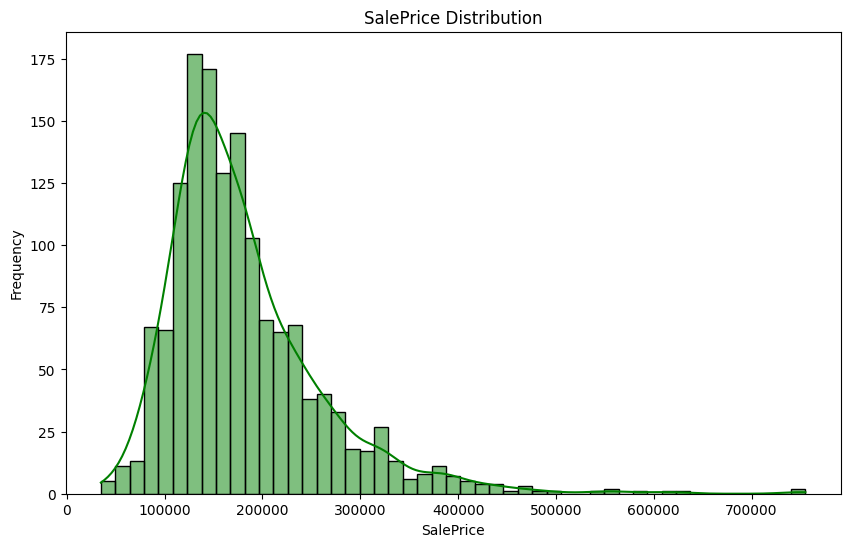

In [24]:
# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load training and testing datasets
train_file = 'train.csv'
test_file = 'test.csv'
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Print basic details about datasets
print(f"Training Dataset Shape: {train_df.shape}")
print(f"Testing Dataset Shape: {test_df.shape}")
print("\nTraining Dataset Information:")
print(train_df.info())

# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, color='Green')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Handle missing values in numeric features (Train dataset)
num_features_train = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[num_features_train] = train_df[num_features_train].fillna(train_df[num_features_train].median())

# Handle missing values in categorical features (Train dataset)
cat_features_train = train_df.select_dtypes(include=['object']).columns
train_df[cat_features_train] = train_df[cat_features_train].fillna(train_df[cat_features_train].mode().iloc[0])

# One-hot encode categorical features in the Train dataset
train_df = pd.get_dummies(train_df, drop_first=True)

# Handle missing values in numeric features (Test dataset)
num_features_test = test_df.select_dtypes(include=['int64', 'float64']).columns
test_df[num_features_test] = test_df[num_features_test].fillna(test_df[num_features_test].median())

# Handle missing values in categorical features (Test dataset)
cat_features_test = test_df.select_dtypes(include=['object']).columns
test_df[cat_features_test] = test_df[cat_features_test].fillna(test_df[cat_features_test].mode().iloc[0])

# One-hot encode categorical features in the Test dataset
test_df = pd.get_dummies(test_df, drop_first=True)

# Align train and test datasets and extract the target variable
target = train_df['SalePrice']
train_df = train_df.drop(columns=['SalePrice'])
train_df, test_df = train_df.align(test_df, join='inner', axis=1)
train_df['SalePrice'] = target

# Separate features and target for model training
features = train_df.drop(columns=['SalePrice'])
target = train_df['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)



2. For the regression model, I selected the following features based on their strong correlation with SalePrice and practical significance:

OverallQual: Strong positive correlation with price (higher quality leads to higher prices).

GrLivArea: Larger living area usually results in higher sale prices.
TotRmsAbvGrd: More rooms generally indicate a higher price.

YearBuilt: Newer homes tend to have higher prices.

GarageCars and GarageArea: The number of cars a garage can accommodate influences price.

Neighborhood: Location significantly affects the house price.

ExterQual, KitchenQual, Functional: These quality and functionality indicators are crucial for determining price.

These features are selected due to their high correlation with SalePrice, practical significance in determining property value, and variance across the dataset.


Linear Regression Performance Metrics:
Mean Squared Error: 1052795614.39
Mean Absolute Error: 20557.79
Root Mean Squared Error: 32446.81
R2 Score: 0.8627

Ridge Regression Performance Metrics:
Mean Squared Error: 936255827.18
Mean Absolute Error: 19996.04
Root Mean Squared Error: 30598.30
R2 Score: 0.8779


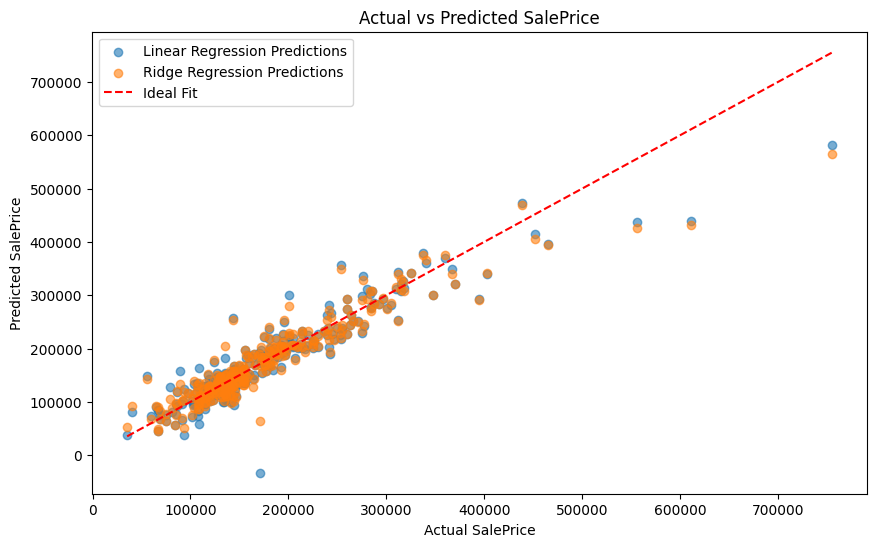

In [25]:
# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Initialize and train Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

# Predict using Linear Regression and Ridge Regression models
linear_preds = linear_model.predict(X_val)
ridge_preds = ridge_regressor.predict(X_val)

# Define a function for model evaluation
def display_metrics(y_actual, y_predicted, model_name):
    mse_value = mean_squared_error(y_actual, y_predicted)
    mae_value = mean_absolute_error(y_actual, y_predicted)
    rmse_value = np.sqrt(mse_value)
    r2 = r2_score(y_actual, y_predicted)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Mean Squared Error: {mse_value:.2f}")
    print(f"Mean Absolute Error: {mae_value:.2f}")
    print(f"Root Mean Squared Error: {rmse_value:.2f}")
    print(f"R2 Score: {r2:.4f}")

# Evaluate Linear Regression model
display_metrics(y_val, linear_preds, "Linear Regression")

# Evaluate Ridge Regression model
display_metrics(y_val, ridge_preds, "Ridge Regression")

# Visualize Actual vs Predicted values for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_val, linear_preds, alpha=0.6, label='Linear Regression Predictions')
plt.scatter(y_val, ridge_preds, alpha=0.6, label='Ridge Regression Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.legend()
plt.show()

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


# 1. An explanation of the chosen PLM (RoBERTa)
With minor adjustments to BERT's initial training process, the transformer-based RoBERTa model—an acronym for Robustly Optimized BERT Approach—is pretrained on sizable datasets. Using a larger batch size, training on more data, and removing the Next Sentence Prediction target, RoBERTa is renowned for outperforming BERT at higher performance levels.

Key Details of RoBERTa:

**Pretraining Data:**
RoBERTa was pretrained on a combination of large text corpora, including:
BookCorpus (800M words)
OpenWebText (38GB of text)
CC-News (76GB of data from the web)
Stories (31GB of text from a variety of stories)
In total, RoBERTa was trained on about 160GB of text data.

**Number of Parameters:**
RoBERTa-base has 125 million parameters, which makes it a manageable model size for many tasks while still being powerful.

**Task-Specific Fine-Tuning:**
RoBERTa does not require any task-specific fine-tuning for zero-shot classification. However, it is commonly fine-tuned for specific tasks like sentiment analysis, text classification, and question answering. For this task, we are utilizing the model in a zero-shot setting, where no additional fine-tuning is applied, and it directly predicts the sentiment labels based on the provided text.

In [26]:
#2. Write your code here

# Import necessary libraries
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset containing annotated sentiments

data = pd.read_csv('/content/sentiment_analysis_data.csv')

# Clean the dataset by removing rows with missing values
data = data.dropna(subset=['clean_text', 'sentiment'])

# Select a random subset of data for faster processing
data = data.sample(n=50, random_state=42)

# Convert sentiment labels to numeric format for evaluation
label_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
data['sentiment_label'] = data['sentiment'].map(label_mapping)

# Initialize the sentiment analysis model using RoBERTa
sentiment_pipeline = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define the sentiment categories for classification
candidate_labels = ["positive", "negative", "neutral"]

# Use the model to predict sentiments for the text data
predictions = []
for text in data['clean_text']:
    result = sentiment_pipeline(text, candidate_labels)
    predicted_label = result['labels'][0]  # Extract the highest-probability label
    predictions.append(predicted_label)

# Convert predicted labels from text to numeric format
predicted_labels = [label_mapping[label] if label in label_mapping else 2 for label in predictions]

# Compare predictions with actual labels to calculate evaluation metrics
ground_truth = data['sentiment_label']

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(ground_truth, predicted_labels)
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

# Display the evaluation results
print("Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluation Results:
Accuracy: 0.4800
Precision: 0.5547
Recall: 0.4800
F1 Score: 0.4107


# Advantages and disadvantages of the selected PLM (RoBERTa)
# Advantages


**High Performance:** Provides excellent sentiment analysis results, outperforming competing models such as BERT.

**Zero-Shot Learning:** This versatile and user-friendly technology can carry out tasks like sentiment analysis without the need for fine-tuning.

**Contextual Understanding:-** Contextual knowledge improves the accuracy of text sentiment analysis by capturing long-range dependencies.

**Simple Integration:** Transformers make it simple to incorporate Hugging Face into Python programs.


# Disadvantages:-

The drawbacks of RoBERTa

**Resource-intensive:** demands a significant amount of processing power, particularly when dealing with big datasets.

**Absence of fine-tuning:** For domain-specific tasks, it might not function as effectively as a fine-tuned model.

**Model Interpretability:** The "black-box" nature of the model makes it challenging to explain its choices.


# Challenges Encountered:

**data preprocessing:** Making sure the data is appropriately cleansed and in line with model assumptions is known as data preprocessing.

**Managing Ambiguity:** Has trouble with sarcasm or unclear language, which can compromise accuracy.

**Computational Efficiency:** For big datasets, it might be resource-intensive and slow.